## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)

<a id='probability'></a>
#### Part I - Probability


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [10]:
df.shape

(294478, 5)

In [11]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

c. The number of unique users in the dataset.

In [12]:
df_total=df.user_id.nunique()
df_total

290584

d. The proportion of users converted.

In [15]:
df_converted=df.query('converted=="1"').user_id.nunique()/df_total
df_not=df.query('converted=="0"').user_id.nunique()/df_total
df_converted, df_not

(0.12104245244060237, 0.8819308702475016)

e. The number of times the `new_page` and `treatment` don't line up.

In [17]:

df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [16]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [4]:
df_t=df[df['group'] == 'treatment']
df_t_o= df_t[df_t['landing_page'] != 'old_page']
df_c=df[df['group'] == 'control']
df_c_o= df_c[df_c['landing_page'] != 'new_page']
df2= df_t_o.append(df_c_o)


df2.groupby(['group','landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


In [20]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page'))== False ].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [21]:
df2.user_id.nunique()


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [22]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [23]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [24]:
df2= df2.drop(df2[(df2.user_id==773192) &(df2['timestamp']== '2017-01-09 05:37:58.781806')].index)
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [25]:
df2_total=df2.user_id.nunique()
df2_converted=df2.query('converted=="1"').user_id.nunique()/df2_total
df2_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [32]:
Conv_control=df2.query('converted == 1 and group == "control"')['user_id'].nunique()
Control_users=df2.query('group == "control"')['user_id'].nunique()
control_prob=Conv_control/Control_users
control_prob

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [34]:
Conv_treatment=df2.query('converted == 1 and group == "treatment"')['user_id'].nunique()
treatment_users=df2.query('group == "treatment"')['user_id'].nunique()
treatment_prob=Conv_treatment/treatment_users
treatment_prob

0.11880806551510564

d. What is the probability that an individual received the new page?

In [28]:
df_newpage=df2.query('landing_page=="new_page"').user_id.nunique()/df2_total
df_newpage

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

The probability of conversion regardless of the page they receive is = 11.96%
The probability of conversion given that the individual is on control group = 12.04%
The probability of conversion given that the individual is on treatment group = 11.88%
The probability of conversion in both the groups are very near to each other. Therefore there is no evidence to prove that one page is leading to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis: p_new-p_old <=0
Alternative Hypothesis: p_new-p_old >0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [39]:
# Compute converted rate
p_new = float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique())

# Display 
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [40]:
# Compute converted rate
p_old = float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique())

# Display 
p_old

0.11959708724499628

c. What is $n_{new}$?

In [41]:
n_new=df2.query('landing_page == "new_page"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$?

In [42]:
n_old=df2.query('landing_page == "old_page"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [46]:
new_page_converted= np.random.choice([0,1],n_new,p=(p_new,1-p_new))
new_page_converted, new_page_converted.mean()

(array([1, 1, 1, ..., 1, 1, 1]), 0.8809028972541463)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [47]:
old_page_converted= np.random.choice([0,1],n_old,p=(p_old,1-p_old))
old_page_converted,old_page_converted.mean()

(array([0, 1, 1, ..., 1, 1, 1]), 0.8818646144526894)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [48]:
new_page_converted.mean()-old_page_converted.mean()


-0.0009617171985430994

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [49]:


p_diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df2.sample(size, replace=True)
    old_page_converted =np.random.choice([0,1],n_old,p=(p_old,1-p_old))
    new_page_converted = np.random.choice([0,1],n_new,p=(p_new,1-p_new))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

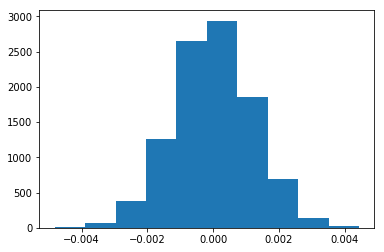

In [51]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

In [52]:
convert_new = df2.query ('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df2.query ('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
Convert_old_actual = convert_old/n_old
Convert_new_actual= convert_new/n_new

obs_diff= Convert_new_actual - Convert_old_actual
obs_diff

-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [53]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

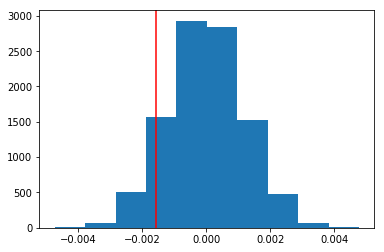

In [54]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(x=obs_diff, color ='red');

In [55]:
(null_vals > obs_diff).mean()

0.9066

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

type 1 error rate is > 0.05 ,We fail to reject null hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [56]:
import statsmodels.api as sm

convert_new 
convert_old 
n_old
n_new


145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [62]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new, convert_old]), np.array([n_new, n_old]),alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [64]:
from scipy.stats import norm
norm.cdf(z_score)

0.09494168724097551

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Yes we agree with the findigs in j and K column , the converted rate for old page and new page has no difference

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

As the response variable is catogorical with response as 0 or 1, we will perform logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [66]:
df2['intercept']=1

In [18]:
df2=df2.join(pd.get_dummies(df2['landing_page']))

In [19]:
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [72]:
lo = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=lo.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [75]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        02:26:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

p_value associated with ab_page is 0.190. Based on P_value we can say that ab_page is insignificant 

Null hypothesis is that there is no difference between treatment and control group
Alternative hypothesis is that treatment group performs better than control group

Part 2 differes as it assumes Old page is better unless it is proved otherwise

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other factors like time can be considered where peak season or non_peak season can be figured out.

The model gets complicated by adding more terms to it

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [10]:
df_c = pd.read_csv('countries.csv')
df_c.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [11]:
df3=df2.merge(df_c , on='user_id',how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,CA


In [12]:
df_c['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [13]:
df3[['CA','UK','US']]=pd.get_dummies(df3['country'])
df3=df3.drop(df3['CA'])

In [14]:
df3['intercept'] = 1

In [21]:
df3=df3.join(pd.get_dummies(df3['landing_page']))

In [22]:
import statsmodels.api as sm
logit3 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK', 'US']])
result = logit3.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:               2.322e-05
Time:                        03:04:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1761
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new_page      -0.0149      0.011     -1.306      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.129      -0.012       0.093
==============================================================================
"""

For every unit decrease in new_page there will be 1.5% increase in conversion , keeping all the other variables constant
For every unit increase in UK there will be 5% increase in conversion , keeping all the other variables constant
For every unit increase in US there will be 4.08% increase in conversion , keeping all the other variables constant

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [27]:
df3['UK_new_page'] = df3['new_page']*df3['UK']
df3['US_new_page'] = df3['new_page']*df3['US']
logit4 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK_new_page', 'US_new_page','UK', 'US']])
result1 = logit4.fit()
result1.summary()


Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290577
Method:                           MLE   Df Model:                            5
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:               3.481e-05
Time:                        03:12:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1922
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
new_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_new_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_new_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK              0.0118      0.040      0.296      0.767      -0.066       0.090
US              0.0175      0.038      0.465      0.642      -0.056       0.091
===============================================================================
"""

In [ ]:
For every unit decrease in new_page there will be 6.7% increase in conversion , keeping all the other variables constant
For every unit increase in UK there will be 1.2% increase in conversion , keeping all the other variables constant
For every unit increase in US there will be 1.75% increase in conversion , keeping all the other variables constant
For every unit increase in UK and new_page there will be 7.8% increase in conversion , keeping all the other variables constant
For every unit increase in US  and new_page there will be 4.6% increase in conversion , keeping all the other variables constant

In this analysis we have observed independent variable Landing_Page and its effect on conversions. We have derived probability of conversion with both the groups "Control" and "treatment" where control being "old_page" and treatment being "new_page", then we derived probilities under null and then using p_new and p_old we have done simulation.
We ran logistics regression as the response variable was catogorical. 

In all the above findings we have observed that New landing page does not have greater impact on Conversions than Old Page.

Hence we fail to reject null Hypothesis and Accept null hypothesis that there is no difference.

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0